# import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# load data

In [24]:
mpg_data = pd.read_csv('C:/Users/acer/Downloads/auto-mpg.data-original',header=None, delimiter=r"\s+", na_values={'?'})

mpg_data.columns = ['displacement','mpg','cylinders','horsepower','weight','acceleration',
                          'model_year','origin','car_name']
                  
mpg_data.head(5)

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


# data types

In [25]:
# Display the information of the data

mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   mpg           406 non-null    float64
 2   cylinders     406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [26]:
mpg_data = mpg_data.drop('car_name', axis= 1)
mpg_data

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [27]:
# also we can use following command for finding missing values

mpg_data.isna().sum()

displacement    8
mpg             0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

# Missing values

In [28]:
# we remove missings
# also we can fill missing values using median or mean
# mpg_data['horsepower'] = mpg_data['horsepower'].fillna(np.median(mpg_data['horsepower']))

mpg_data = mpg_data.dropna()
mpg_data.isnull().sum()

displacement    0
mpg             0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [29]:
# we remove dupicate rows

mpg_data = mpg_data.drop_duplicates()

# Exploratory Data Analysis (EDA)

In [30]:
# describe numerical features

mpg_data.describe()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [31]:
mpg_data['mpg'].value_counts()

mpg
4.0    199
8.0    103
6.0     83
3.0      4
5.0      3
Name: count, dtype: int64

# Looking for Relationship

In [32]:
corr_ = mpg_data.corr()
corr_['mpg'].sort_values(ascending=False)

mpg             1.000000
cylinders       0.950823
weight          0.897527
horsepower      0.842983
model_year     -0.345647
acceleration   -0.504683
origin         -0.568932
displacement   -0.777618
Name: mpg, dtype: float64

# feature selection

In [33]:
numeric_subset = mpg_data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'mpg':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

features = numeric_subset
features.head(5)

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,sqrt_displacement,log_displacement,...,sqrt_horsepower,log_horsepower,sqrt_weight,log_weight,sqrt_acceleration,log_acceleration,sqrt_model_year,log_model_year,sqrt_origin,log_origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,4.242641,2.890372,...,11.401754,4.867534,59.194594,8.161660,3.464102,2.484907,8.3666,4.248495,1.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,3.872983,2.708050,...,12.845233,5.105945,60.770058,8.214194,3.391165,2.442347,8.3666,4.248495,1.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,4.242641,2.890372,...,12.247449,5.010635,58.617404,8.142063,3.316625,2.397895,8.3666,4.248495,1.0,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,4.000000,2.772589,...,12.247449,5.010635,58.591808,8.141190,3.464102,2.484907,8.3666,4.248495,1.0,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,4.123106,2.833213,...,11.832160,4.941642,58.728187,8.145840,3.240370,2.351375,8.3666,4.248495,1.0,0.0


In [34]:
def remove_collinear_features(x, threshold):
    y = x['mpg']
    x = x.drop('mpg', axis = 1)
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    
    # Add the score back in to the data
    x['mpg'] = y
               
    return x
    return drop_cols

In [35]:
finll_features = remove_collinear_features(features, 0.6);
finll_features

,displacement,cylinders,model_year,mpg
0,18.0,307.0,70.0,8.0
1,15.0,350.0,70.0,8.0
2,18.0,318.0,70.0,8.0
3,16.0,304.0,70.0,8.0
4,17.0,302.0,70.0,8.0
...,...,...,...,...
401,27.0,140.0,82.0,4.0
402,44.0,97.0,82.0,4.0
403,32.0,135.0,82.0,4.0
404,28.0,120.0,82.0,4.0


# scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
finll_features['displacement'] = scaler.fit_transform(finll_features[['displacement']])
finll_features['mpg'] = scaler.fit_transform(finll_features[['mpg']])
finll_features['cylinders'] = scaler.fit_transform(finll_features[['cylinders']])
finll_features['model_year'] = scaler.fit_transform(finll_features[['model_year']])
finll_features.head(10)

,displacement,cylinders,model_year,mpg
0,-0.698638,1.077290,-1.625315,1.483947
1,-1.083498,1.488732,-1.625315,1.483947
2,-0.698638,1.182542,-1.625315,1.483947
3,-0.955212,1.048584,-1.625315,1.483947
4,-0.826925,1.029447,-1.625315,1.483947
5,-1.083498,2.244637,-1.625315,1.483947
6,-1.211785,2.483848,-1.625315,1.483947
7,-1.211785,2.349890,-1.625315,1.483947
8,-1.211785,2.493416,-1.625315,1.483947
9,-1.083498,1.871469,-1.625315,1.483947


# modeling-PolyNominal Kernel

In [50]:
X = pd.DataFrame(finll_features.drop('mpg', axis=1))
y = finll_features[['mpg']]

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 5 )
X_poly = poly.fit_transform(X)

In [51]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly,y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_poly, y_train_poly)

LinearRegression()

In [53]:
y_pred_te = lr.predict(x_test_poly)
y_pred_tr = lr.predict(x_train_poly)

 # finding the best value for Q - PolyNominal Kernel

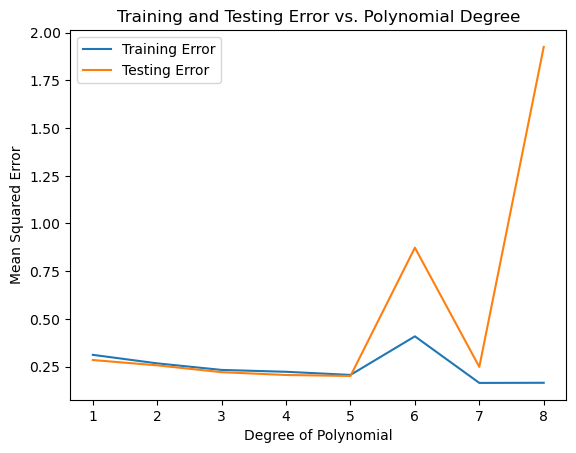

In [54]:
error_tr = []
error_te = []

deg = 8

for Q in range(1,deg+1):
    poly = PolynomialFeatures(degree = Q)
    X_poly = poly.fit_transform(X)
    x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly,y, test_size=0.1, random_state=42)
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train_poly)
    y_pred_poly_te = lr.predict(x_test_poly)
    y_pred_poly_tr = lr.predict(x_train_poly)
    error_te.append(np.sqrt(mean_squared_error(y_test_poly, y_pred_poly_te)))
    error_tr.append(np.sqrt(mean_squared_error(y_train_poly, y_pred_poly_tr)))

degrees = range(1, deg+1)

plt.plot(degrees, error_tr, label='Training Error')
plt.plot(degrees, error_te, label='Testing Error')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error vs. Polynomial Degree')
plt.legend()
plt.show()

# evaluation

In [56]:
rmse_te = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly_te))
rmse_tr = np.sqrt(mean_squared_error(y_train_poly, y_pred_poly_tr))

print('The  test rmse  is: ', rmse_te)
print('The  train rmse  is: ', rmse_tr)



The  test rmse  is:  1.9256781545702095
The  train rmse  is:  0.16473789856839488
